<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart.

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [158]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [195]:
# read the datset and manipulate
df = pd.read_csv('generated_dataset.csv')
df.drop_duplicates(inplace=True)
df.size
df.fillna(df.mean(), inplace=True)
df

,area,price
0,2600.0,550000.0
1,2601.0,550150.0
2,2602.0,550300.0
3,2603.0,550450.0
4,2604.0,550600.0
...,...,...
495,3095.0,624450.0
496,3096.0,624400.0
497,3097.0,624550.0
498,3098.0,625700.0


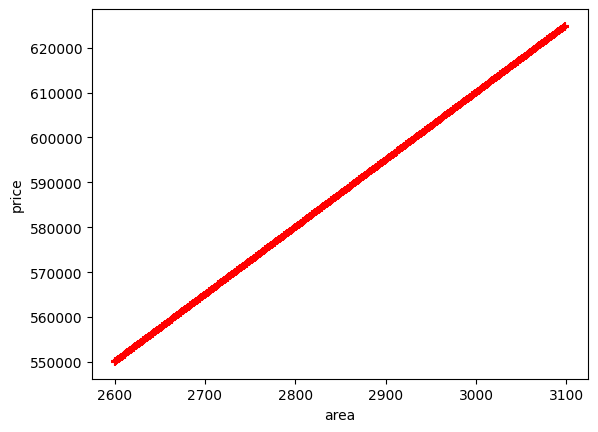

In [224]:
# plot
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.savefig("scatterplot.jpg")

In [213]:
# reshape
area = df.area.values.reshape(-1,1)
price = df.price.values.reshape(-1,1)

In [214]:
# train test split
from sklearn.model_selection import train_test_split

area_train,area_test,price_train,price_test = train_test_split(area,price,random_state=0,test_size=0.25)

In [215]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(area_train,price_train)

LinearRegression()

In [216]:
# score
print(reg.score(area_test,price_test))

1.0


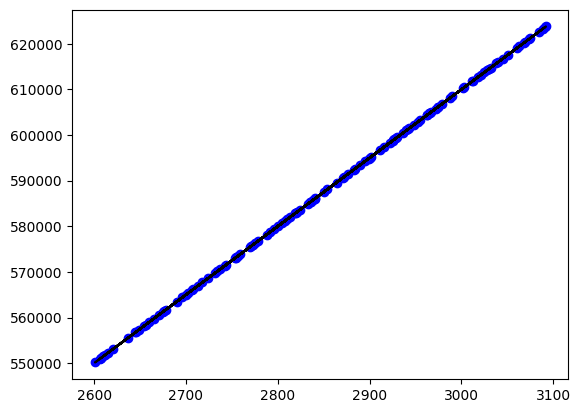

In [217]:
price_pred = reg.predict(area_test)
plt.scatter(area_test, price_test, color ='b')
plt.plot(area_test, price_pred, color ='k')
plt.show()

In [218]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


mae = mean_absolute_error(y_true=price_test,y_pred=price_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=price_test,y_pred=price_pred) #default=True
rmse = mean_squared_error(y_true=price_test,y_pred=price_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


**(1) Predict price of a home with area = 3300 sqr ft**

In [219]:
reg.predict([[3300]])

array([[655000.]])

In [220]:
reg.coef_

array([[150.]])

In [221]:
reg.intercept_

array([160000.])

**Y = m * X + b (m is coefficient and b is intercept)**

In [222]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [223]:
reg.predict([[5000]])

array([[910000.]])